In [1]:
import pandas as pd
import numpy

url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/data/data_stud/stud_spisok_ege.csv"

df = pd.read_csv(url, sep=';')
df.head()

,stud_kod,predmet_name,ball,year,svid_status
0,50095,Русский язык,76,2013,Действительно
1,50095,Английский язык,94,2013,Действительно
2,50095,Математика,56,2013,Действительно
3,50095,Обществознание,70,2013,Действительно
4,50104,Русский язык,72,2013,Действительно


In [68]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/data/data_stud/stud_spisok_ball.csv"

df1 = pd.read_csv(url, sep=';')
listt = []
for i in df1['ball']:
     listt.append(float(str(i).replace(",",".")))
df1['ball'] = listt
df1.head()

df1 = df1[df1['ball'].notna()]
df1 = df1[df1['stud_kod'].notna()]
df1 = df1[df1['uch_plan_kod'].notna()]
df1 = df1[df1['predmet_name'].notna()]
df1 = df1[df1['ts'].notna()]
df1 = df1[df1['cd_nomer'].notna()]
df1 = df1[df1['semestr'].notna()]
df1 = df1[df1['cd_type_name'].notna()]
df1 = df1[df1['uch_plan_punkt_kod'].notna()]

df1

,stud_kod,uch_plan_kod,predmet_name,ball,ts,cd_nomer,semestr,cd_type_name,uch_plan_punkt_kod
0,8,1,История,25.0,25-дек-11,1,1,Эссе,255
1,8,1,История,30.0,25-дек-11,2,1,Презентация,255
3,8,1,Философия,15.0,30-апр-15,2,1,Реферат,293
4,8,1,Философия,18.0,30-апр-15,1,1,Аналитическая работа,293
5,8,1,Философия,21.6,30-апр-15,3,1,Контрольная работа,293
...,...,...,...,...,...,...,...,...,...
65529,2682,1,Бухгалтерский учет,16.0,14-февр-13,3,3,Контрольная работа,958
65530,2682,1,Бухгалтерский учет,22.0,14-февр-13,4,3,Экзамен,958
65531,2682,1,Менеджмент,7.0,31-окт-12,1,3,Эссе,959
65532,2682,1,Менеджмент,12.0,20-нояб-12,2,3,Тест,959


In [19]:
#Задание 1

In [3]:
df1['stud_kod'].unique().size + df['stud_kod'].unique().size

3286

In [20]:
#Задание 2

In [4]:
df.groupby('predmet_name')['predmet_name'].count().sort_values()[::-1][:4]

predmet_name
Математика        3049
Русский язык      3045
Обществознание    3033
Сочинение         1303
Name: predmet_name, dtype: int64

In [128]:
#Задание 3

In [5]:
dist = input()
ans = []
balls = df[df['predmet_name'] == dist]['ball']
ans.append(balls.mean())
ans.append(balls.min())
ans.append(balls.max())
print(*ans)

 Математика


64.13545424729419 0 100


In [70]:
#Задание 4

In [6]:
df_year = df[["predmet_name", "ball", "year"]]
last_stat = df_year.groupby("year")["ball"].sum() / df_year.groupby("year")["year"].count()
ans = last_stat.sort_values()
print(ans.index[0],ans.index[-1])

2009 2013


In [155]:
#Задание 5

In [7]:
df1.groupby("cd_type_name")['cd_type_name'].count().sort_values()[::-1].index[0]

'Контрольная работа'

In [170]:
#Задание 6

In [9]:
df1_stat = df1[["predmet_name","cd_type_name", "ball"]]
def proc(predmet):
    ans1 = df1_stat[df1_stat['predmet_name'] == predmet].groupby('cd_type_name')['ball'].max()
    ans2 = df1_stat[df1_stat['predmet_name'] == predmet].groupby('cd_type_name')['ball'].sum() / df1_stat[df1_stat['predmet_name'] == predmet].groupby('cd_type_name')['ball'].count()
    ans3 = ans2 / ans1
    return ans3.sum() / ans3.count()
ans = []
for i in numpy.delete(df1['predmet_name'].unique()[::-2][2::], 2, axis=None):
    ans.append([i, proc(i)])
df2 = pd.DataFrame(ans)
df2[df2[1] < 0.55][[0]]

,0
12,Финансовая статистика
14,Демография и статистика населения


In [178]:
#Задание 7

In [10]:
df1_h_stat = df1[["stud_kod", "predmet_name","cd_type_name", "ball"]]

def funct(predmet, stud):
    df1_h = df1_h_stat[df1_h_stat['stud_kod'] == stud][["predmet_name","cd_type_name", "ball"]]
    pupil = dict(df1_h[df1_h['predmet_name'] == predmet].groupby('cd_type_name')['ball'].sum())
    maxx = dict(df1_stat[df1_stat['predmet_name'] == predmet].groupby('cd_type_name')['ball'].max())
    ans = []
    for i in list(pupil.keys()):
        ans.append(pupil.get(i) / maxx.get(i))
    if len(ans) != 0:
        return sum(ans)/ len(ans)
    else:
        return 0



In [11]:
ans_end = []
for i in list(df1_h_stat['stud_kod'].unique()):
    ans1 = []
    for j in list(df1_h_stat[df1_h_stat['stud_kod'] == i]['predmet_name'].unique()):
        ans1.append(funct(j, i))
    if len(ans1) != 0:
        ans_end.append([i, sum(ans1)/ len(ans1)])
ans_end

C:\Users\ivanl\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


[[8, 1.1327445967135432],
 [9, 1.040452604954724],
 [21, 0.938300138327748],
 [55, 0.8369706275141616],
 [70, 0.9265939603606591],
 [73, 1.0678005161940176],
 [87, 1.0693057001510862],
 [88, 1.2896762847308934],
 [93, 1.0626963028530378],
 [94, 1.1751575530347769],
 [100, 1.130902368151708],
 [103, 1.062254730915167],
 [104, 0.9539965413493439],
 [119, 1.2258304471418202],
 [140, 0.9063437816347659],
 [142, 1.1812511968715638],
 [144, 1.0619750881927514],
 [154, 0.9910855476493756],
 [164, 1.1808884637810708],
 [165, 1.1394810869891898],
 [175, 1.0006935649025703],
 [179, 0.989354172082415],
 [185, 1.0399529217081345],
 [198, 0.9742499046834006],
 [201, 1.302324128760001],
 [218, 0.7929274783729049],
 [220, 1.0174614557549004],
 [224, 1.13783357932776],
 [227, 1.0389816249076584],
 [229, 1.1071040426068983],
 [231, 1.1675005804040328],
 [241, 1.0082457349748317],
 [253, 0.95763684160534],
 [261, 0.8554996892560239],
 [262, 1.1766014164202077],
 [263, 1.2200920537340103],
 [265, 1.12987

In [15]:
pd_end = pd.DataFrame(ans_end)
print(*list(pd_end[pd_end[1] < 0.8][0]))

218 427 776 1610 1662 1704 1711 1758 2653


In [291]:
#Задание 8

In [51]:
df1_h_stat = df1[["stud_kod", "predmet_name","cd_type_name", "ball", "ts", "semestr"]]
df1_h_stat = df1_h_stat[df1_h_stat['ball'].notna()]
df1_s = df1_h_stat[df1_h_stat['stud_kod'] == 8]
listt = df1_s['semestr'].unique()

In [32]:
def funct1(predmet, stud):
    df1_h = df1_s1[df1_s1['stud_kod'] == stud][["predmet_name","cd_type_name", "ball"]]
    pupil = dict(df1_s1[df1_s['predmet_name'] == predmet].groupby('cd_type_name')['ball'].sum())
    maxx = dict(df1_stat[df1_stat['predmet_name'] == predmet].groupby('cd_type_name')['ball'].max())
    ans = []
    for i in list(pupil.keys()):
        ans.append(pupil.get(i) / maxx.get(i))
    if len(ans) != 0:
        return sum(ans)/ len(ans)
    else:
        return 0

In [73]:
def funct2(p, flag):
    ans_end = []
    for i in list(listt):
        df1_s1 = df1_s[df1_s['semestr'] == i]
        ans1 = []
        for j in list(df1_s1[df1_s1['stud_kod'] == p]['predmet_name'].unique()):
            ans1.append(funct1(j, p))
        if len(ans1) != 0:
            ans_end.append([i, sum(ans1) / len(ans1)])
    answer = 1000000
    sem = - 1
    if flag == 0:
        for i in ans_end:
            if (i[1] < answer) and (i[1] != 0):
                answer = i[1]
                sem = i[0]
        return sem
    else:
        return ans_end

In [80]:
student = []
a = input()
while a != '':
    student.append(a)
    a = input()
otvet = []
listt = df1_s['semestr'].unique()
for i in student:
    otvet.append([int(i), funct2(int(i), 0)])
otvet

 8
 


C:\Users\ivanl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


[[8, 3]]

In [57]:
def funct3(p):
    ans_end = []
    datelist = list(df1['ts'])
    for i in range(len(datelist)):
        datelist[i] = datelist[i].split("-")[-1]
    listt = list(set(datelist))
    for i in list(listt):
        df1_s1 = df1_s[df1_s['ts'].split("-")[-1] == i]
        ans1 = []
        for j in list(df1_s1[df1_s1['stud_kod'] == p]['predmet_name'].unique()):
            ans1.append(funct1(j, p))
        if len(ans1) != 0:
            ans_end.append([i, sum(ans1) / len(ans1)])
    answer = 1000000
    sem = - 1
    for i in ans_end:
        if (i[1] < answer) and (i[1] != 0):
            answer = i[1]
            sem = i[0]
    return sem

In [72]:
student = []
a = input()
while a != '':
    student.append(a)
    a = input()
otvet = []
#for i in student:
    #otvet.append([int(i), funct3(int(i))])


 8
 


In [70]:
#Задание 10

 8
 


C:\Users\ivanl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


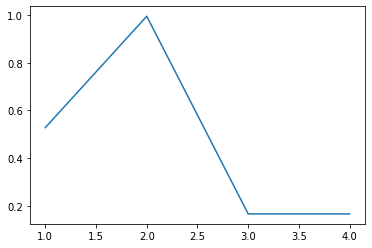

In [103]:
import matplotlib.pyplot as plt

student = []
a = input()
while a != '':
    student.append(a)
    a = input()
otvet = []
for i in student:
    otvet.append([int(i), funct2(int(i), 1)])
for j in range(len(otvet)):
    otvet1 = []
    otvet2 = []
    for i in range(len(otvet[j][1])):
        if otvet[j][1][i][1] != 0:
            otvet1.append(otvet[j][1][i][0])
            otvet2.append(otvet[j][1][i][1])


    plt.plot(otvet1, otvet2)
    plt.show()

In [104]:
#Задание 9

In [132]:
student = []
a = input()
while a != '':
    student.append(a)
    a = input()
for stud in student:
    df1_stud = df1[(df1['stud_kod'] == stud) & (df1['cd_type_name'] ==  "Контрольная работа")]
    maxx = df1[(df1['stud_kod'] == stud) & (df1['predmet_name'] == 'Философия') & (df1['cd_type_name'] ==  "Контрольная работа")]['ball'].max()
    mass = list(df1_stud['predmet_name'].unique())
    ans = []
    for i in mass:
        maxx = df1[(df1['predmet_name'] == i) & (df1['cd_type_name'] ==  "Контрольная работа")]['ball'].max()
        summ = df1_stud[df1_stud['predmet_name'] == i]['ball'].sum()
        leng= df1_stud[df1_stud['predmet_name'] == i]['ball'].count()
        ans.append([i, (summ / leng) / maxx])
    print(pd.DataFrame(ans).sort_values(by=[1])[::-1][:10])

 8
 2682
 


KeyError: 1

In [122]:
mass

['Философия',
 'Психология',
 'Математический анализ',
 'Линейная алгебра',
 'Информатика',
 'Экономическая теория',
 'Право',
 'Иностранный язык',
 'Социология',
 'Экономическая история',
 'Бухгалтерский учет',
 'Менеджмент',
 'Безопасность жизнедеятельности',
 'Иностранный язык (профессиональный)',
 'Микроэкономика',
 'Правовое обеспечение хозяйственной деятельности',
 'Анализ хозяйственной деятельности',
 'Статистика',
 'Экономика фирмы',
 'Институциональная экономика',
 'Финансы',
 'История экономических учений',
 'Политология',
 'Макроэкономика',
 'Теория рисков',
 'Налоги и налогообложение',
 'Мировая экономика и международные экономические отношения',
 'Социально-экономическая география',
 'Экономика труда',
 'Страхование',
 'Банковское дело',
 'Бюджетная система Российской Федерации',
 'Корпоративные финансы',
 'Оценка стоимости бизнеса',
 'Банковский менеджмент',
 'Бухгалтерский учет в кредитной организации']